# Imports

In [36]:
import torchrain as tr # import torchrain
import numpy as np
from matplotlib import pyplot as plt

# Load OpenCML Dataset

In [37]:
open_cml_dataset = tr.read_open_cml_dataset('../data/open_cml.p') #  read OpenCML dataset

# Select Link and Plot link data

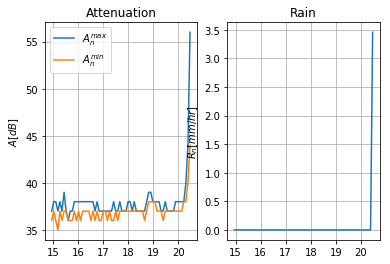

In [38]:
link_index = 4
link_data = open_cml_dataset[link_index] # select a link
link_min_max=link_data.create_min_max_link(300)
link_min_max.plot() # plot link data
plt.show()

# Run Statistics wet dry classification
 

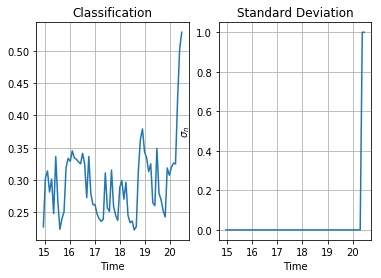

In [39]:
rnn = tr.wet_dry.wet_dry_network(1,tr.neural_networks.RNNType.GRU)
wd_classification, _ = rnn(link_min_max.as_tensor(constant_tsl=10), link_data.meta_data.as_tensor(),
                                   rnn.init_state())  # run classification method#%% Plot Wet Dry Classification result
plt.subplot(1, 2, 1)
plt.plot(link_min_max.time(), wd_classification.detach().numpy().flatten())
plt.title('Probability')
plt.xlabel('Time')
tr.change_x_axis_time_format('%H')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(link_min_max.time(), np.round(wd_classification.detach().numpy().flatten()))
plt.xlabel('Time')
plt.title('Classification')
tr.change_x_axis_time_format('%H')
plt.ylabel(r'$\sigma_n$')
plt.grid()
plt.show()

# References
